# Pizza Price Prediction

### Data Source: Kaggle

Introduction

A new pizza company wants to startup in the area and wants to understand the pices of its competitors. This analysis will help the company determine the price of their new pizza menu that is launching without affecting sales or profits.

Objective

Determine which features affects the price of the pizza


## Importing Libraries

In [1]:
# Data Structure
import pandas as pd
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Others
sns.set(style='darkgrid')
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Henry Oguns\Desktop\Data Science Portfolio\datasets\pizza_v2.csv")
pd.set_option("display.max_columns",None)
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [3]:
df.shape

(129, 9)

Dataset has 129 observations and 9 features

In [4]:
# Checking the data types in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [5]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [6]:
df.duplicated().sum()

2

In [7]:
df = df.drop_duplicates()
df.duplicated().sum()

0

The dataset contanins 0 Null and 2 Duplicates Values

In [8]:
# Understandin the overall statistic of the dataset

df.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,127,127,127,127,127,127,127,127,127
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,28,30,41,76,84,71


## Data Cleaning

In [9]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [10]:
# Renaming the price_rupiah column to price

df = df.rename({'price_rupiah' : 'price'}, axis = 1)

In [11]:
df['price'] = df['price'].str.replace('Rp', '')
df['price'] = df['price'].str.replace(',', '').astype(int)
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [12]:
# Currency conversion

def convert (value):
    return value*0.0054

In [13]:
df['price'] = df['price'].apply(convert)

In [14]:
df.head(2)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no


In [15]:
# Removing 'inch' and  ',' from the diameter columns

df['diameter'] = df['diameter'].str.replace('inch', '')
df['diameter'] = df['diameter'].str.replace('', '').astype('float')

## Exploratory Data Analysis

In [16]:
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [17]:
# Count of data from each of the companies

df.company.value_counts()

company
C    30
E    28
A    25
B    24
D    20
Name: count, dtype: int64

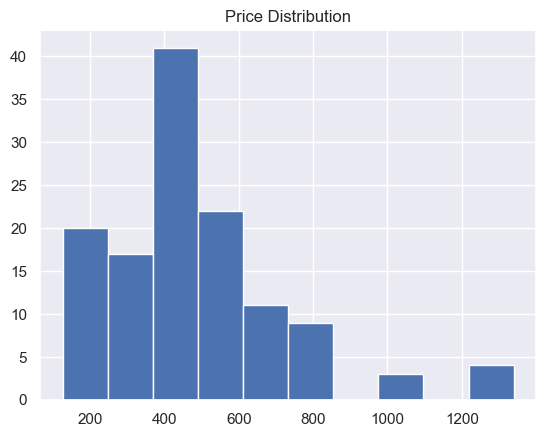

In [18]:
# Price distribution across the dataset

plt.hist(x = df.price)
plt.title('Price Distribution')
plt.show()

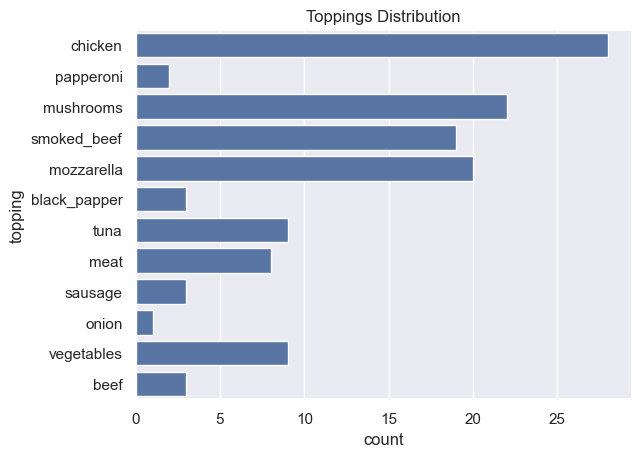

In [19]:
# Topping distribution across the dataset

sns.countplot(y = df.topping)
plt.title('Toppings Distribution')
plt.show()

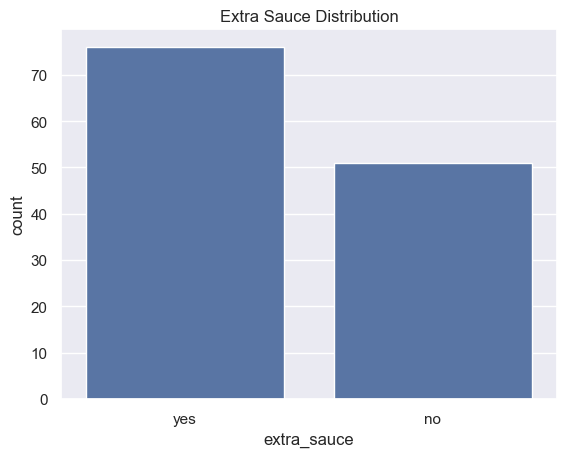

In [20]:
# Extra Sauce distribution across the dataset


sns.countplot(x = df['extra_sauce'])
plt.title('Extra Sauce Distribution')
plt.show()

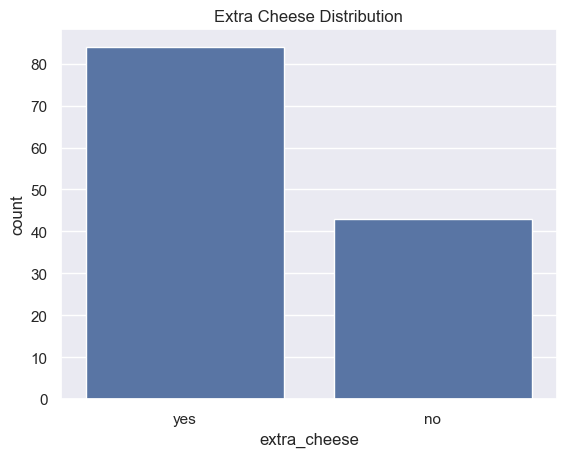

In [21]:
# Extra Cheese distribution across the dataset

sns.countplot(x = df['extra_cheese'])
plt.title('Extra Cheese Distribution')
plt.show()

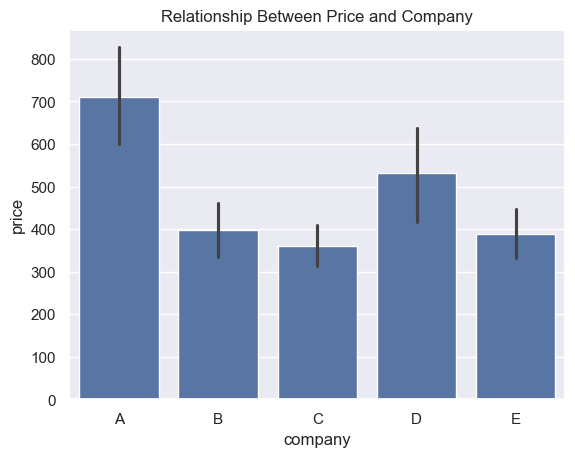

In [22]:
# Relationship Between Price and Company Column

sns.barplot(y = df['price'], x = df['company'] )
plt.title('Relationship Between Price and Company')
plt.show()

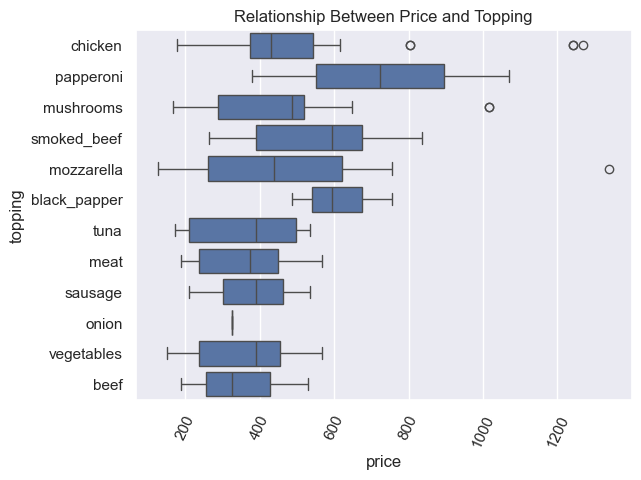

In [23]:
# Relationship Between Price and Topping Column

plt.title('Relationship Between Price and Topping')
sns.boxplot(x = df['price'], y = df['topping'])
plt.xticks(rotation = 65)
plt.show()

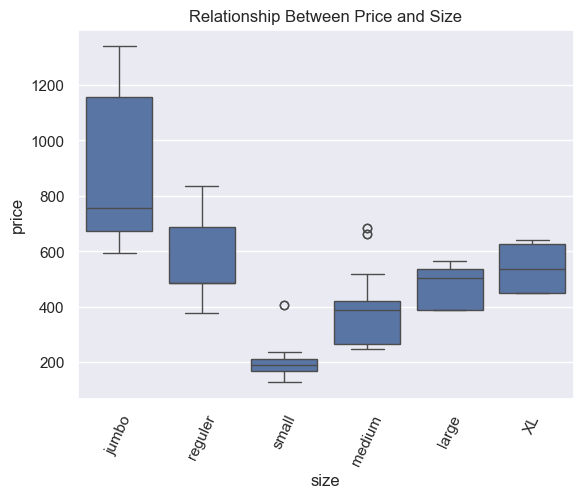

In [24]:
# Relationship Between Price and Size Column

plt.title('Relationship Between Price and Size')
sns.boxplot(y = df['price'], x = df['size'])
plt.xticks(rotation = 65)
plt.show()

In [25]:
# finding the most expensive pizza

df[df['price'].max()==df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [26]:
# finding the diameter of a jumbo size pizza

df[df['size']=='jumbo']['diameter']

0     22.0
1     20.0
4     18.0
5     18.5
6     16.0
10    18.5
11    16.0
15    18.5
16    16.0
20    22.0
21    18.5
79    18.5
80    16.0
84    22.0
85    18.5
Name: diameter, dtype: float64

In [27]:
# finding the diameter of XL size pizzas

df[df['size']=='XL']['diameter']

29     17.0
35     17.0
41     17.0
47     17.0
93     17.0
99     17.0
104    17.0
116    17.0
Name: diameter, dtype: float64

## Ouliers Removal

XL size pizza is 17inch and why will a jumbo size pizza have a diameter les than 17inch. That means that jumbo size pizza with diameter leass than 17inch are outliers in the datasets.

In [28]:
# Removing Jumbo size pizza outliers

df[(df['size']=='jumbo') & (df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [29]:
df = df.drop(df.index[[6,11,16,80]])

## Feature Encoding

In [30]:
# obtaining and defining categorical columns in the dataset

cate_cols = df.select_dtypes(include=['object']).columns
cate_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [31]:
le = LabelEncoder()

for i in cate_cols:
    df[i] = le.fit_transform(df[i])

In [32]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [33]:
X = df.drop('price', axis = 1)
y = df['price']

## Model Development

Here, I have used Logistic regression, Support Vector Machine, Random forest and Gradient boosting models to predict churn customers and compared which model works better for our dataset.

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state = 42)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rfr.predict(X_test)
y_pred4 = gb.predict(X_test)
y_pred5 = xgb.predict(X_test)

## Model Eveluation

In [37]:
score1 = r2_score(y_test, y_pred1)
score2 = r2_score(y_test, y_pred2)
score3 = r2_score(y_test, y_pred3)
score4 = r2_score(y_test, y_pred4)
score5 = r2_score(y_test, y_pred5)

In [38]:
print(score1, score2, score3, score4, score5)

0.6391199071772933 -0.05977151402032166 0.7215242536813213 0.8160443660009487 0.7305652447272124


In [39]:
final_data = pd.DataFrame({'Model':['LR', 'SVM','RFR','GB', 'XGB'],
                          'R2_SCORE': [r2_score(y_test, y_pred1),
                                  r2_score(y_test, y_pred2),
                                  r2_score(y_test, y_pred3),
                                  r2_score(y_test, y_pred4),
                                  r2_score(y_test, y_pred5),
                                 ]})
final_data

,Model,R2_SCORE
0,LR,0.639120
1,SVM,-0.059772
2,RFR,0.721524
3,GB,0.816044
4,XGB,0.730565


<Axes: xlabel='Model', ylabel='R2_SCORE'>

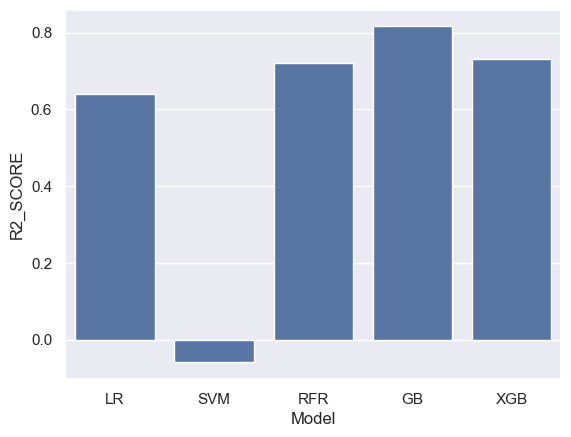

In [40]:
sns.barplot(y = final_data.R2_SCORE, x = final_data.Model)

The Gradient Boost Regressor model is the best model for the prediction with an R2_Score of 81.6%

# Feature Importance

Let get to know the features that influnence the Gradient Boosting and XGBoosting Models

In [41]:
# Gradient Boosting Regressor

gb.feature_importances_
fea2 = pd.Series(gb.feature_importances_, index = X_train.columns)
fea2

company            0.006979
diameter           0.653605
topping            0.046912
variant            0.110409
size               0.151964
extra_sauce        0.023574
extra_cheese       0.003653
extra_mushrooms    0.002904
dtype: float64

<Axes: >

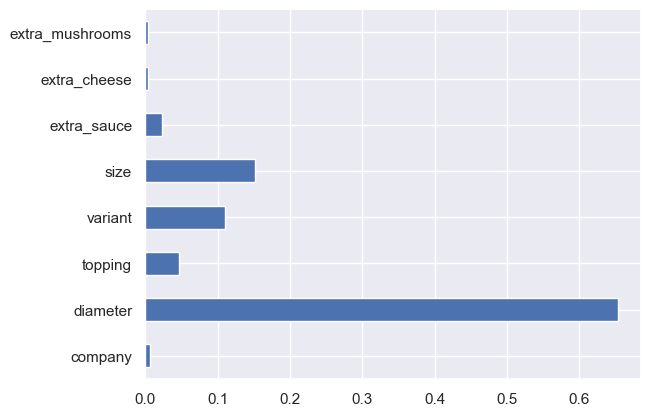

In [42]:
fea2.plot(kind = 'barh')

In [43]:
#XGBoosting Regressor

xgb.feature_importances_
fea3 = pd.Series(xgb.feature_importances_, index = X_train.columns)
fea3  

company            0.004064
diameter           0.434312
topping            0.009284
variant            0.069684
size               0.417542
extra_sauce        0.052759
extra_cheese       0.009080
extra_mushrooms    0.003276
dtype: float32

<Axes: >

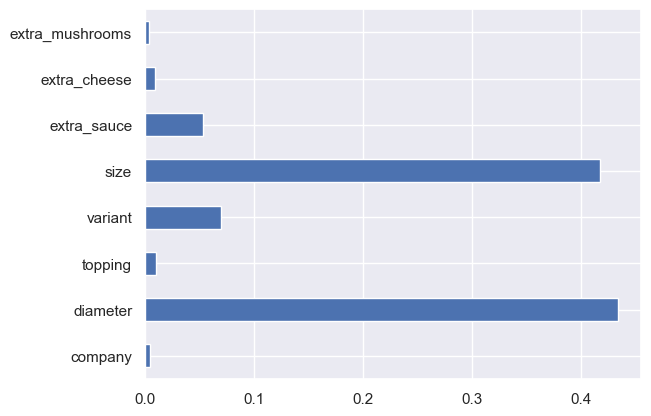

In [44]:
fea3.plot(kind = 'barh')

Through out the models, the top 3 features; Size, Varient and Diameter features, shows to be important in the prediction of price.

## Saving Model

In [46]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [47]:
import pickle

In [48]:
with open("Pizza_price_prediction.pki", "wb") as f:
    pickle.dump(gb,f)

## Conclusion

In this notebook, I deploy machine learning models to predict the pizza price  with prediction score of 81.5%. 

Determined the 3 main/key features influnecing the price, which are diameter, size and varient of the pizza.

This analysis would help the sales departement determine the best prices for new launching pizza menus and keeping profit loss of the company on the first year below 20%.
